In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [5]:
diabets_table = pd.read_csv('/Users/maxim/Downloads/diabetes.csv')
diabets_table.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X, y = diabets_table.drop(['Outcome'], axis=1), diabets_table.Outcome

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
forest_classifier = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': range(10, 51, 10),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 11, 2),
    'min_samples_split': range(20, 101, 10),
    'min_samples_leaf': range(1, 16, 3)
}

In [17]:
grid_forest_classifier = GridSearchCV(forest_classifier, params, cv=3)

In [18]:
grid_forest_classifier

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11, 2),
                         'min_samples_leaf': range(1, 16, 3),
                         'min_samples_split': range(20, 101, 10),
                         'n_estimators': range(10, 51, 10)})

In [19]:
grid_forest_classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11, 2),
                         'min_samples_leaf': range(1, 16, 3),
                         'min_samples_split': range(20, 101, 10),
                         'n_estimators': range(10, 51, 10)})

In [20]:
best_forest_classifier = grid_forest_classifier.best_estimator_

In [21]:
grid_forest_classifier.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 20}

In [26]:
from sklearn.metrics import recall_score, precision_score

In [27]:
y_predicted = best_forest_classifier.predict(X_test)

In [31]:
recall = recall_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
score = best_forest_classifier.score(X_test, y_test)

In [32]:
recall, precision, score

(0.5465116279069767, 0.7121212121212122, 0.7716535433070866)

In [33]:
important_features = best_forest_classifier.feature_importances_

In [37]:
important_features_table = pd.DataFrame({'features': diabets_table.drop(['Outcome'], axis=1).columns, 'features_score': important_features})

In [42]:
important_features_table = important_features_table.sort_values(by='features_score', ascending=False)
important_features_table

,features,features_score
1,Glucose,0.445999
5,BMI,0.197612
7,Age,0.143179
0,Pregnancies,0.052623
6,DiabetesPedigreeFunction,0.051884
4,Insulin,0.043670
2,BloodPressure,0.036926
3,SkinThickness,0.028107


<Axes: >

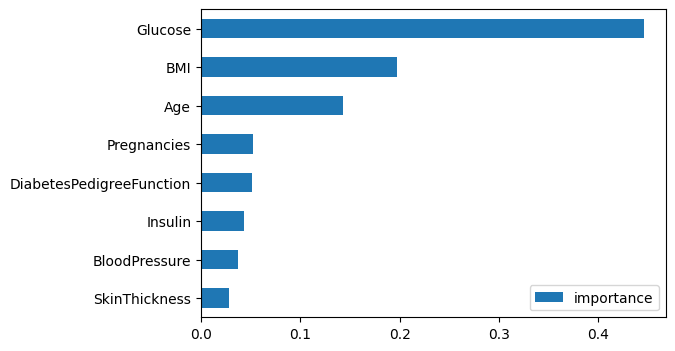

In [43]:
imp = pd.DataFrame(best_forest_classifier.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(6, 4))

In [47]:
from graphviz import Source
from IPython.display import display

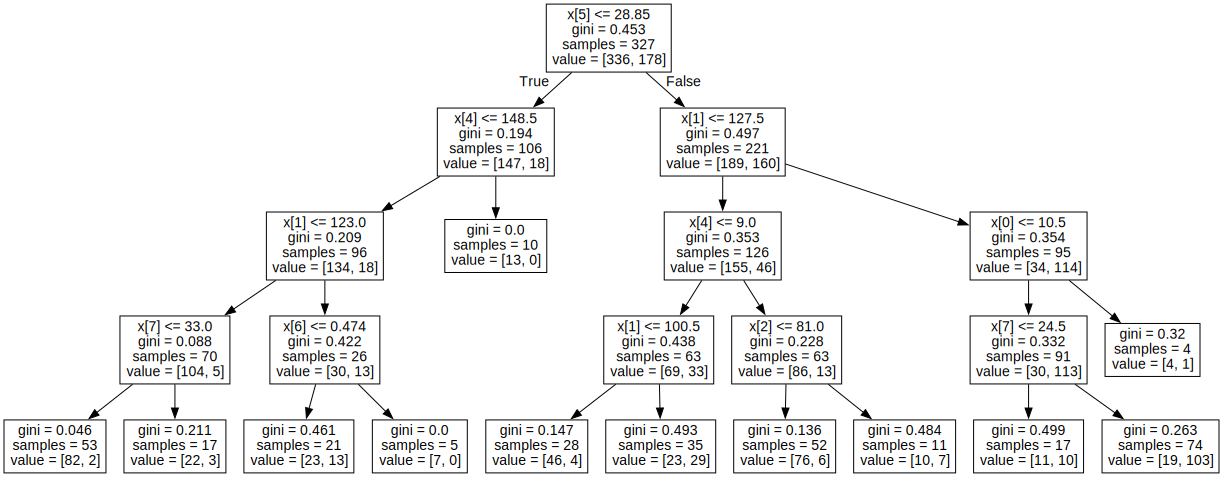

In [53]:
display(Source(export_graphviz(best_forest_classifier.estimators_[0])))

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[149,  19],
       [ 39,  47]])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

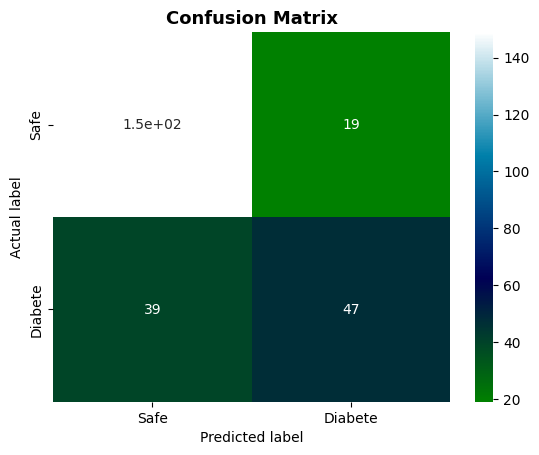

In [66]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, cmap="ocean")

plt.title("Confusion Matrix", fontsize=13, fontweight='bold')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

ax.xaxis.set_ticklabels(['Safe', 'Diabete']); 
ax.yaxis.set_ticklabels(['Safe', 'Diabete']);

plt.tight_layout

In [60]:
# Большее количество предсказанных TN, меньше всего FN

In [61]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Correlation Matrix'}>

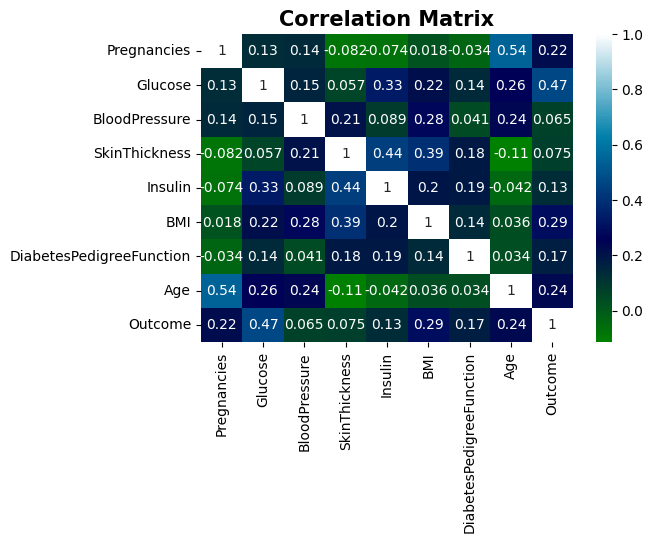

In [67]:
plt.figure(figsize=(6,4), edgecolor="black")
plt.title("Correlation Matrix", color="black", fontweight='bold',
         fontsize=15)
corr = diabets_table.corr()
sns.heatmap(corr, cmap ='ocean', annot=True, cbar=True)